<img src='./figures/logo-ecole-polytechnique-ve.jpg' style='position:absolute; top:0; right:0;' width='100px' height='' alt='' />

<center><b>Bachelor of Ecole Polytechnique</b></center>
<center>MAA106: Introduction to Numerical Analysis, year 1, semester 2</center>
<center>Maxime Breden</center>

# Exam



<div markdown=1 class=Abstract> 

**This subject is about approximating integrals and improving the convergence of some algorithms, and consists of 3 sections:**

- [Section 1](#warmup): A couple of warm-up questions closely related to what we have already done during the course.
- [Section 2](#sing): Approximation of convergent integrals where the function can be singular at the endpoints of the integration interval.
- [Section 3](#improve): Back to regular functions, we try to improve the convergence of the composite trapezoidal rule in a smart way.

If you get stuck on one question, you can skip it and still use the results it contains to try to answer the other questions. Sections 2 and 3 are completely independent.

<div markdown=1 class=Abstract> 

**Instructions:**

- All the questions you have to answer are stated in **"Do it yourself"** cells
- Provide your answers in the **"Answer"** cells already created, using markdown/latex formula when needed, or in code cells when you need to write some code
- Justify (even with a few words) your answers in the **"Answer"** cells
- When looking at a picture you produced, the grader must be able to understand what is depicted without having to look at the code, so make sure to include relevant labels and titles when needed, **also when not demanded explicitely**.
- At the end of the exam (16:30), save and upload your notebook to the designated area on Moodle.
- **Reminder 1: If the notebook does not have the usual aspect, for instance if you do not have cells of different colors, click on the "not trusted" button in the top right corner. If you still do not get the usual aspect, execute the very last cell of the notebook.**
- **Reminder 2: Do not forget to execute the cell below, to load the required libraries.**


In [1]:
## loading python libraries

# necessary to display plots inline:
%matplotlib inline   

# load the libraries
import matplotlib.pyplot as plt # 2D plotting library
import numpy as np              # package for scientific computing  

from math import *              # package for mathematics (pi, arctan, sqrt, factorial ...)

<a id="warmup"></a>
## Warm-up

Given an interval $[a,b]$, a uniform mesh made of $m\geq 1$ subintervals $[x_k,x_{k+1}]$, $k=0,\ldots,m-1$, where

$$
x_k = a + kh, \qquad{} h=\frac{b-a}{m}, 
$$

we recall that a composite quadrature rule is an approximation of $\int_{a}^b f(x) dx$ obtained by using elementary quadrature rules on each of the subintervals $[x_k,x_{k+1}]$.

For instance, the composite trapezoidal rule approximate the integral as follows:

$$
\int_{a}^b f(x) dx \approx \frac{b-a}{m}\sum_{k=0}^{m-1} \frac{f(x_k)+f(x_{k+1})}{2} = \frac{b-a}{m}\left(\frac{f(x_0)+f(x_{m})}{2} + \sum_{k=1}^{m-1} f(x_k) \right) .
$$

We provide below an implementation of the composite trapezoidal rule with a uniform mesh.

In [2]:
def composite_trapezoidal_rule(f,a,b,m):
    """
    Approximate integral using the composite trapezoidal rule
    -----------------------------------------
    Inputs :
    f: function to be integrated
    a,b: the end-points of the interval on which the integral has to be computed
    m: the number of subintervals in the uniform subdivision of [a,b]
    
    Output :
    the value of the composite trapezoidal rule applied to f on [a,b]
    """
    x = np.linspace(a,b,m+1) # the uniform mesh with m subintervals
    return (b-a)/m * ( (f(x[0])+f(x[-1]))/2 + np.sum(f(x[1:-1])) )

<div  markdown=1 class="DoIt"> 

What is the formula describing the composite mid-point rule (for an interval $[a,b]$ and a uniform mesh with $m$ subintervals)?

<div  markdown=1 class="Answer">
The formula is for a uniform mesh with $m$ subintervals:
$$
\int_a^b f(x)dx  \approx \frac{b-a}{m}\sum_{k=0}^{m-1} f(x_{k+1/2}),
$$

<div  markdown=1 class="DoIt"> 

In the following cell, complete the function so that it computes the composite mid-point rule.

In [5]:
def composite_midpoint_rule(f,a,b,m):
    """
    Approximate integral using the composite mid-point rule
    -----------------------------------------
    Inputs :
    f: function to be integrated
    a,b: the end-points of the interval on which the integral has to be computed
    m: the number of subintervals in the uniform subdivision of [a,b]
    
    Output :
    the value of the composite midpoint rule applied to f on [a,b]
    """
    x = np.linspace(a,b,m+1) # the uniform mesh with m subintervals
    x_mid = 1/2*x[1:] + 1/2*x[:-1]
    return (b-a)/m * ( np.sum(f(x_mid[:-1])) )

<div  markdown=1 class="Def">

In this exam, we denote by $E_m^{trap}(f)$  the error between $\int_a^b f(x)dx$ and the approximate valued provided by the composite trapezoidal rule, and by $E_m^{mid}(f)$  the error between $\int_a^b f(x)dx$ and the approximate valued provided by the composite mid-point rule.

<div  markdown=1 class="DoIt"> 

- Given an indefinitely differentiable function $f$ on $[a,b]$, can we get an upper-bound for $E_m^{trap}(f)$ and $E_m^{mid}(f)$ of the form
$$
E_m(f) \leq c \frac{1}{m^\gamma}  \quad{}\text{or equivalently}\quad{} E_m(f) \leq c h^\gamma,
$$
where $c$ is a constant which may depend on $f$, $a$ and $b$ but not on $m$? Which theorem from the course allows you to answer this question? (Copy and paste the relevant theorem in the cell just below).
- For both $E_m^{trap}(f)$ and $E_m^{mid}(f)$, what is the largest value of $\gamma$ one can have in the above estimate (which holds for every indefinitely differentiable function $f$ on $[a,b]$)? Explain where this value comes from.

<div  markdown=1 class="Thm">
**Convergence of composite quadrature rules.** Consider an interval $[a,b]$, a set of $m+1$ mesh points $(x_k)_{0\leq k\leq m}$ such that $a = x_0 < x_1 < \ldots < x_m = b$, an integer $n$, and a composite quadrature rule of the form

$$
\int_a^b f(x)dx = \sum_{k=0}^{m-1} \int_{x_k}^{x_{k+1}} f(x)dx  \approx \sum_{k=0}^{m-1} I^n_{[x_k,x_{k+1}]}(f).
$$

If the elementary quadrature rule used on each subinterval $[x_k,x_{k+1}]$ has a degree of accuracy of at least $n_a$, and $f\in{\cal C}^{n_a+1}([a,b])$, then there exists a constant $C$ (independent of $m$), such that the error is bounded as follows:

$$
E_m(f) \leq C \sup_{x\in [a,b]} \left\vert \,f^{(n_a+1)}(x)\,\right\vert (b-a) \, h^{n_a+1},
$$

where we recall that

$$h = \max_{k=0,\ldots,m-1} \left\vert x_{k+1} - x_k \right\vert.$$

<div  markdown=1 class="Answer">

- The above theorem shows that it is indeed possible toget an upper-bound for $E_m^{trap}(f)$ and $E_m^{mid}(f)$ of the form
$$
E_m(f) \leq c \frac{1}{m^\gamma}  \quad{}\text{or equivalently}\quad{} E_m(f) \leq c h^\gamma,
$$
where $c$ is a constant which may depend on $f$, $a$ and $b$ but not on $m$

- For both $E_m^{trap}(f)$ and $E_m^{mid}(f)$, the largest value of $\gamma$ one can have in the above estimate (which holds for every indefinitely differentiable function $f$ on $[a,b]$) is 2 which is 1+ the degree of accuracy of the midpoint rule and the trapezoidal rule. This comes from the theorem above.

<div  markdown=1 class="DoIt"> 

Consider the interval $[a,b]=[0,1]$, and the function $f_1:x\mapsto \exp(x)$. 

- Complete the cell below in order to compute the errors $E_m^{trap}(f_1)$ and $E_m^{mid}(f_1)$ for $m$ between $1$ and $100$. 
- Plot the results, with a log-scale for the errors (remember to add appropriate labels for the axes and the curves). 

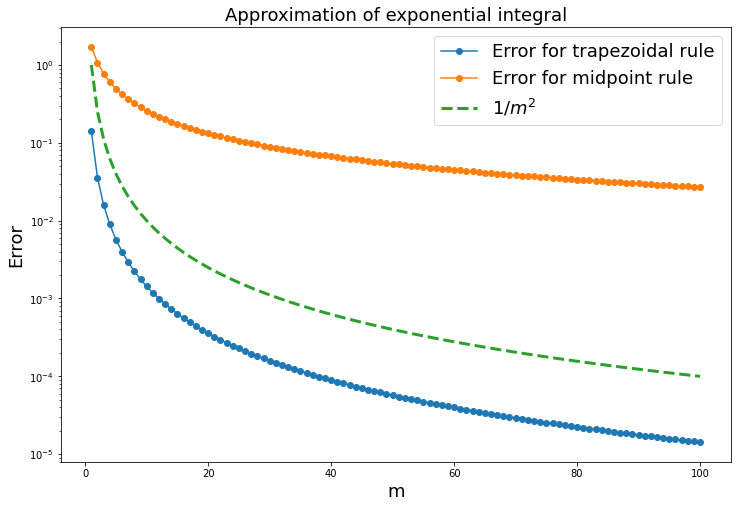

In [11]:
def f1(x):
    return np.exp(x)

a = 0
b = 1
I = np.exp(1) - 1 # the exact value of the integral

m_max = 100
tab_m = np.arange(1, m_max+1)
tab_Itrap = np.zeros(m_max)
tab_Imid = np.zeros(m_max)

# computation of the approximated value of the integral for m = 1,...,m_max
for m in tab_m:
    tab_Itrap[m-1] = composite_trapezoidal_rule(f1,a,b,m)
    tab_Imid[m-1] = composite_midpoint_rule(f1,a,b,m)
    
# computation of the error
tab_err_trap = np.abs(tab_Itrap - I)
tab_err_mid = np.abs(tab_Imid - I)

# plot
fig = plt.figure(figsize=(12, 8))
plt.plot(tab_m, tab_err_trap, marker="o", label="Error for trapezoidal rule")
plt.plot(tab_m, tab_err_mid, marker="o", label="Error for midpoint rule")
plt.xlabel('m', fontsize = 18)
plt.ylabel('Error', fontsize = 18)
plt.legend(fontsize = 18)
plt.title('Approximation of exponential integral', fontsize = 18)
plt.yscale('log') # add as many lines as you need here
plt.show()

<div  markdown=1 class="DoIt"> 

We still consider the same example: $[a,b]=[0,1]$, and $f_1:x\mapsto \exp(x)$. 

- Use the appropriate scales, and any extra mean necessary, in order to numerically or graphically study how the two errors go to zero with respect to $m$, and try to recover the exponent $\gamma$ from the previous question. 
- What does this tell you regarding the quality of the error bounds described in the previous question?

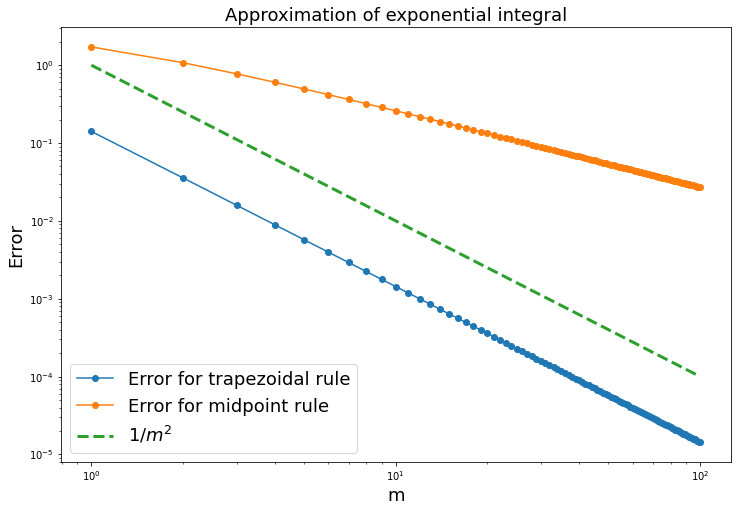

In [12]:
# plot
def f1(x):
    return np.exp(x)

a = 0
b = 1
I = np.exp(1) - 1 # the exact value of the integral

m_max = 100
tab_m = np.arange(1, m_max+1)
tab_Itrap = np.zeros(m_max)
tab_Imid = np.zeros(m_max)

# computation of the approximated value of the integral for m = 1,...,m_max
for m in tab_m:
    tab_Itrap[m-1] = composite_trapezoidal_rule(f1,a,b,m)
    tab_Imid[m-1] = composite_midpoint_rule(f1,a,b,m)

# computation of the error
tab_err_trap = np.abs(tab_Itrap - I)
tab_err_mid = np.abs(tab_Imid - I)

# plot
fig = plt.figure(figsize=(12, 8))
plt.plot(tab_m, tab_err_trap, marker="o", label="Error for trapezoidal rule")
plt.plot(tab_m, tab_err_mid, marker="o", label="Error for midpoint rule")
plt.plot(tab_m, 1/tab_m**2, linestyle="--", linewidth=3, label="$1/m^2$")
plt.xlabel('m', fontsize = 18)
plt.ylabel('Error', fontsize = 18)
plt.legend(fontsize = 18)
plt.title('Approximation of exponential integral', fontsize = 18)
plt.yscale('log') # add as many lines as you need here
plt.xscale('log')
plt.show()

<div  markdown=1 class="Answer">

We see that $\dfrac{1}{m^2}$ is a good approximation of the error for the trapezoidal rule. However, it is not a good approximation for the midpoint rule and shows that the upper bound may not always be very indicative of the variation of the error of the function


<a id="sing"></a>
## Singular integrals

In this section, we consider the open interval $(a,b)=(0,1)$, the function $f_2:x\mapsto \frac{e^x}{\sqrt{x}}$, and try to approximate integrals like

$$
I_2 = \int_0^1 \frac{e^x}{\sqrt{x}} dx,
$$

for which the integrand is still integrable (the integral converges) but may be singular at the endpoints of the interval of integration.

### Direct computation

<div  markdown=1 class="DoIt"> 

Is one of the two algorithms that we have studied in the previous section (composite trapezoidal rule and composite mid-point rule), less suitable than the other to approximate this integral, and why?

<div  markdown=1 class="Answer"> 
The midpoint rule is much more suitable in this case than the trapezoidal rule as the the trapezoidal rule causes this integral to diverge.

This is because the function being integrated is obviously not smooth over the entire interval.

<div  markdown=1 class="DoIt"> 

In the cell below, use the appropriate method (between the composite trapezoidal rule and the composite mid-point rule) to approximate $I_2=\int_0^1 f_2(x) dx$, compute the errors $E_m(f_2)$ for $m$ between $1$ and $100$, and plot the error in an appropriate scale. 

In order to compute the error, you can use the approximation $I_2 \approx 2.9253034918143632$.

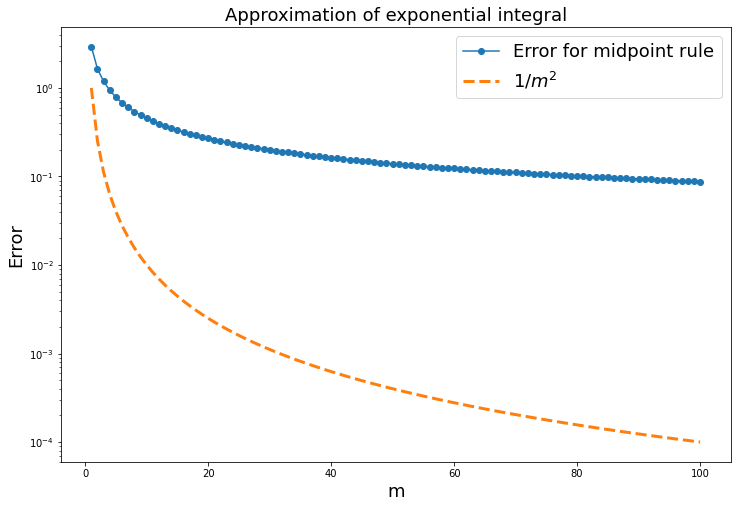

In [17]:
def f2(x):
    return np.exp(x)/np.sqrt(x)

a = 0
b = 1
I2 = 2.9253034918143632 # the almost exact value of the integral



m_max = 100
tab_m = np.arange(1, m_max+1)
tab_Imid = np.zeros(m_max)

# computation of the approximated value of the integral for m = 1,...,m_max
for m in tab_m:
    tab_Imid[m-1] = composite_midpoint_rule(f2,a,b,m)

# computation of the error
tab_err_mid = np.abs(tab_Imid - I2)


fig = plt.figure(figsize=(12, 8))
plt.plot(tab_m, tab_err_mid, marker="o", label="Error for midpoint rule")
plt.plot(tab_m, 1/tab_m**2, linestyle="--", linewidth=3, label="$1/m^2$")
plt.xlabel('m', fontsize = 18)
plt.ylabel('Error', fontsize = 18)
plt.legend(fontsize = 18)
plt.title('Approximation of exponential integral', fontsize = 18)
plt.yscale('log') # add as many lines as you need here
plt.show()


<div  markdown=1 class="DoIt"> 

- Study numerically or graphically how the error goes to zero with respect to $m$ in that case. *Hint: here and in some subsequent examples, do not be surprised if, either graphically or numerically using polyfit, you find that the error behaves like $\frac{cste}{m^\gamma}$ with $\gamma$ not an integer. The correct $\gamma$ here is indeed not an integer.* 
- Compare with the results obtained in the previous section, and comment on what you now observe.

<div  markdown=1 class="Answer"> 


### Improving the convergence

In order to improve the convergence, we are going to reformulate the integral $I_2$ as follows:

$$
I_2 = \int_0^1 \frac{e^x}{\sqrt{x}} dx 
= \int_0^1 \frac{1}{\sqrt{x}} dx + \int_0^1 \frac{e^x-1}{\sqrt{x}} dx.
$$

We now have two integrals to compute, but the first one is a Riemann integral whose value we can calculate by hand: $ \int_0^1 \frac{1}{\sqrt{x}} dx = 2$, therefore there is still only one integral which we have to approximate, namely

$$
I_3 = \int_0^1 \frac{e^x-1}{\sqrt{x}} dx.
$$

In the sequel, we denote $f_3: x\mapsto \frac{e^x-1}{\sqrt{x}}$.

<div  markdown=1 class="DoIt"> 

In the cell below, approximate again $I_2$, this time using the above reformulation, and the same composite rule as before for $I_3$. Study numerically or graphically how the error now goes to zero with respect to $m$, when $m$ becomes larger and larger (*note: for this example you may need to take $m$ larger than $100$ in order to properly observe the asymptotic behavior*).

Comment on the obtained convergence, and in particular on how it compares with what you obtained previously, when approximating $I_2$ directly. Can you make a link with the behavior of the functions $f_2$ and $f_3$ when $x$ goes to $0$?

<div  markdown=1 class="Answer"> 


### Improving the convergence even further

**The following question is probably the hardest one of the exam. It is recommended that you skip it at first, and only come back to it if you finish the rest of the exam and still have some time left.**

Looking at the above reformulation from $I_2$ to $2+I_3$, what we in fact did was isolate the $0$-th order term in the Taylor expansion of the exponential (namely $e^x\approx 1$), for which we can compute the integral explicitly, and then consider the remainder. 

<div  markdown=1 class="DoIt"> 

Can you devise a way to improve the convergence even more, repeating/generalizing the same idea we used when rewritting $I_2$ as $2+I_3$? Describe and explain your suggestion, implement it, and study the asymptotic behavior of the error with respect to $m$. Comment upon the results. If we keep repeating this procedure, will we always get a faster and faster asymptotic convergence?

<div  markdown=1 class="Answer">


<a id="improve"></a>
## Back to non-singular integrals 

In this section, we go back to the approximation of the integral of a function $f:[a,b]\to\mathbb{R}$ which is very regular (say infinitely differentiable)

$$
I = \int_a^b f(x) dx,
$$

using the composite trapezoidal rule. In the sequel, we denote by $T_m(f)$ the approximation of $I = \int_a^b f(x) dx$ obtained with the composite trapezoidal rule using a uniform mesh with $m$ subintervals. Notice that the error $E_m$ can be expressed in terms of $T_m$: we simply have

$$
E_m(f) = \left\vert T_m(f) - I \right\vert. 
$$

One can prove (but we will simply admit it here) that we have the following expression for $T_m(f)$ when $m$ goes to $+\infty$:

$$
T_m(f) = I + \frac{c_1}{m^2} + \frac{c_2}{m^4} + O\left(\frac{1}{m^6}\right).
$$

<div  markdown=1 class="DoIt"> 

Assuming $m$ is an even integer, what expression do you get for $T_{\frac{m}{2}}(f)$ using the above formula?

<div  markdown=1 class="Answer"> 


<div  markdown=1 class="DoIt"> 

Let $\alpha$ and $\beta$ be two real numbers. Find a condition on $\alpha+\beta$ such that

$$
\alpha T_m(f) + \beta T_{\frac{m}{2}}(f) - I = \frac{(\alpha + 4\beta)c_1}{m^2} + \frac{(\alpha + 16\beta)c_2}{m^4} +  O\left(\frac{1}{m^6}\right).
$$

<div  markdown=1 class="Answer"> 


<div  markdown=1 class="DoIt"> 

Find real numbers $\alpha$ and $\beta$ such that 

$$
\alpha T_m(f) + \beta T_{\frac{m}{2}}(f) - I =  \frac{\tilde c_2}{m^4} + O\left(\frac{1}{m^6}\right),
$$

for some constant $\tilde c_2$ (which you do NOT have to give explicitly).

<div  markdown=1 class="Answer"> 


<div  markdown=1 class="DoIt"> 

Using the previous questions, construct in the cell below a new algorithm to approximate $I$ which appropriately combines the composite trapezoidal rule for $m$ and $\frac{m}{2}$ subintervals, and for which the error behaves like $\frac{c}{m^4}$ when $m$ goes to $+\infty$.

- *Hint1: You can call the function `composite_trapezoidal_rule` inside you new algorithm.*
- *Hint2 (may not be needed, depending on implementation choices): In python, if you take an even integer m and computes m/2, you get a floating point number. If you want to have an integer instead, write m//2.*

In [ ]:
def combined_algo(f,a,b,m):
    """
    Approximate integral combining the composite trapezoidal rule for m and m/2 appropriately
    -----------------------------------------
    Inputs :
    f: function to be integrated
    a,b: the end-points of the interval on which the integral has to be computed
    m: the number of subintervals
    
    Output :
    the value of the new algorithm applied to f on [a,b]
    """
    
    
    return 

<div  markdown=1 class="DoIt"> 

Using the interval $[a,b]=[0,1]$ and the function $f_1:x\mapsto \exp(x)$ as a test case, create a plot to compare the behavior of this new approximation with the original composite trapezoidal rule (take care of only considering even values of $m$). Do you recover the expected behavior for the errors? Comment on the obtained results.

<div  markdown=1 class="Answer"> 


<div  markdown=1 class="DoIt"> 

If we were to implement `combined_algo` differently, and NOT call the function `composite_trapezoidal_rule` twice but instead directly combine the values $f(x_k)$ appropriately, how would this new algorithm compare, in terms of how many times one has to evaluate the function $f$, to the original composite trapezoidal rule? Would this comparison have been similar, had we used the composite mid-point rule instead of the composite trapezoidal rule when building the new algorithm?

<div  markdown=1 class="Answer"> 


# END

In [ ]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom3.css").read()
    return HTML(styles)
css_styling()